<a href="https://colab.research.google.com/github/ferpatugo/Estatistica-Python/blob/main/Aula_Exemplo_PROJETO_FINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto Final Exemplo

# Carregando Pacotes

In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis
from plotly.offline import init_notebook_mode, iplot
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import plotly.io as pio
pio.renderers.default = 'colab'

# Configurações para exibir gráficos no notebook
init_notebook_mode(connected=True)

# Leitura do dataset

In [47]:
def convert_num(x):
    try:
        return float(x.replace(',', '.').strip())
    except:
        return pd.NA

enade2017 = pd.read_csv(
    'MICRODADOS_ENADE_2017.txt',
    delimiter=';',
    encoding='latin1',
    converters={
        'NT_OBJ_CE': convert_num,
        'NT_GER': convert_num
    }
)


/tmp/ipython-input-511161554.py:7: DtypeWarning:

Columns (29,31,32,45,46,47,54,56) have mixed types. Specify dtype option on import or set low_memory=False.



In [34]:
enade2017

,NU_ANO,CO_IES,CO_CATEGAD,CO_ORGACAD,CO_GRUPO,CO_CURSO,CO_MODALIDADE,CO_MUNIC_CURSO,CO_UF_CURSO,CO_REGIAO_CURSO,...,QE_I72,QE_I73,QE_I74,QE_I75,QE_I76,QE_I77,QE_I78,QE_I79,QE_I80,QE_I81
0,2017,1,1,10028,5710,3,1,5103403,51,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2017,1,1,10028,5710,3,1,5103403,51,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2017,1,1,10028,5710,3,1,5103403,51,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2017,1,1,10028,5710,3,1,5103403,51,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2017,1,1,10028,5710,3,1,5103403,51,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
537431,2017,19578,2,10022,6208,5001279,1,3513009,35,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
537432,2017,19578,2,10022,6208,5001279,1,3513009,35,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
537433,2017,19578,2,10022,6208,5001279,1,3513009,35,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
537434,2017,19578,2,10022,6208,5001279,1,3513009,35,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [48]:
# Seleção das variáveis desejadas
microdados_enade_filtrados = enade2017[['CO_GRUPO','CO_REGIAO_CURSO','NU_IDADE','TP_SEXO','CO_TURNO_GRADUACAO','NT_GER',
                                         'QE_I01','QE_I02','QE_I08','QE_I21','QE_I23','NT_OBJ_FG','NT_OBJ_CE']]



# Filtrando o curso de ADS

In [49]:
microdados_ti = microdados_enade_filtrados[microdados_enade_filtrados['CO_GRUPO'] == 72].copy()

# Transformando variáveis - Colocando os labels

In [50]:

estado_civil_map = {'A': 'Solteiro(a)', 'B': 'Casado(a)', 'C': 'Separado(a)', 'D': 'Viúvo(a)', 'E': 'Outro'}
microdados_ti['estado_civil2'] = microdados_ti['QE_I01'].map(estado_civil_map)

regiao_map = {1: 'Norte', 2: 'Nordeste', 3: 'Sudeste', 4: 'Sul', 5: 'Centro-Oeste'}
microdados_ti['regiao'] = microdados_ti['CO_REGIAO_CURSO'].map(regiao_map)

sexo_map = {'M': 'Masculino', 'F': 'Feminino'}
microdados_ti['sexo'] = microdados_ti['TP_SEXO'].map(sexo_map)

hestudos_map = {'A': 'Nenhuma, apenas assisto as aulas',
                'B': 'De uma a três',
                'C': 'De quatro a sete',
                'D': 'De oito a doze',
                'E': 'Mais de doze'}
microdados_ti['hestudos'] = microdados_ti['QE_I23'].map(hestudos_map)



# Data quality - Remover NA's

In [51]:
microdados_ti_sem_NA = microdados_ti.dropna()

# Estatísticas resumo da variável NT_OBJ_CE

In [53]:
microdados_ti_sem_NA['NT_OBJ_CE'] = pd.to_numeric(microdados_ti_sem_NA['NT_OBJ_CE'], errors='coerce')

moda_series = microdados_ti_sem_NA['NT_OBJ_CE'].mode()
moda_value = moda_series.iloc[0] if not moda_series.empty else None

estatisticas = {
    'quantidade': microdados_ti_sem_NA['NT_OBJ_CE'].count(),
    'media': microdados_ti_sem_NA['NT_OBJ_CE'].mean(),
    'mediana': microdados_ti_sem_NA['NT_OBJ_CE'].median(),
    'moda': moda_value,
    'cv': microdados_ti_sem_NA['NT_OBJ_CE'].std() / microdados_ti_sem_NA['NT_OBJ_CE'].mean() * 100,
    'assimetria': skew(microdados_ti_sem_NA['NT_OBJ_CE']),
    'curtose': kurtosis(microdados_ti_sem_NA['NT_OBJ_CE'])
}
print(estatisticas)

{'quantidade': np.int64(9636), 'media': np.float64(42.09059775840598), 'mediana': 40.0, 'moda': np.float64(40.0), 'cv': np.float64(37.42576212104056), 'assimetria': np.float64(0.18642528468211472), 'curtose': np.float64(-0.278578476857577)}


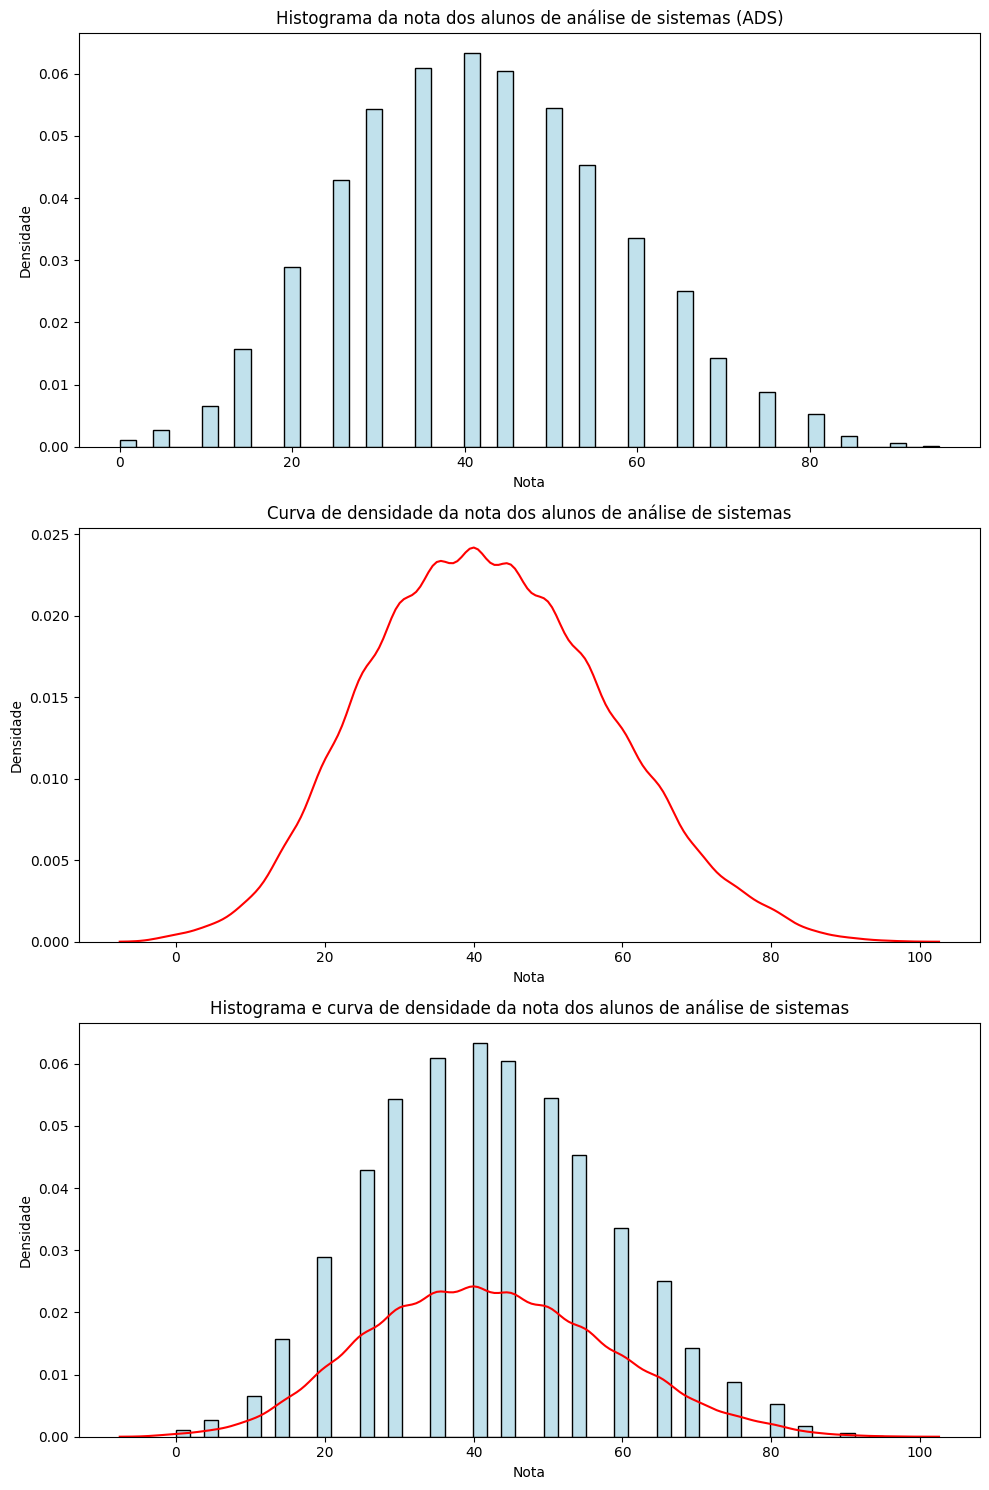

In [54]:
# Gráficos da análise descritiva para nota dos alunos de ADS
fig, axs = plt.subplots(3, 1, figsize=(10, 15))

# Histograma
sns.histplot(microdados_ti_sem_NA['NT_OBJ_CE'], bins=50, stat='density', color='lightblue', ax=axs[0], edgecolor='black')
axs[0].set_title('Histograma da nota dos alunos de análise de sistemas (ADS)')
axs[0].set_xlabel('Nota')
axs[0].set_ylabel('Densidade')

# Curva de densidade
sns.kdeplot(microdados_ti_sem_NA['NT_OBJ_CE'], color='red', ax=axs[1])
axs[1].set_title('Curva de densidade da nota dos alunos de análise de sistemas')
axs[1].set_xlabel('Nota')
axs[1].set_ylabel('Densidade')

# Histograma e curva de densidade juntos
sns.histplot(microdados_ti_sem_NA['NT_OBJ_CE'], bins=50, stat='density', color='lightblue', ax=axs[2], edgecolor='black')
sns.kdeplot(microdados_ti_sem_NA['NT_OBJ_CE'], color='red', ax=axs[2])
axs[2].set_title('Histograma e curva de densidade da nota dos alunos de análise de sistemas')
axs[2].set_xlabel('Nota')
axs[2].set_ylabel('Densidade')

plt.tight_layout()
plt.show()


In [60]:
# Comparando médias por sexo e estado civil
grouped_sexo_estado = microdados_ti_sem_NA.groupby(['sexo', 'estado_civil2']).agg(
    quantidade=('NT_GER', 'count'),
    media=('NT_GER', 'mean'),
    mediana=('NT_GER', 'median'),
    cv=('NT_GER', lambda x: x.std() / x.mean() * 100),
    amplitude_interquartil=('NT_GER', lambda x: x.quantile(0.75) - x.quantile(0.25))
).reset_index().sort_values(by='mediana', ascending=False)
print(grouped_sexo_estado)

        sexo estado_civil2  quantidade      media mediana         cv  \
8  Masculino   Solteiro(a)        6196  40.731795    40.2  31.758092   
3   Feminino   Solteiro(a)        1093  40.165874    39.5  30.432810   
6  Masculino         Outro         264     39.575    39.5  33.667011   
7  Masculino   Separado(a)         154  39.625974    38.9  32.832128   
1   Feminino         Outro          39       40.5    38.7  29.818383   
5  Masculino     Casado(a)        1681  39.110589    38.2  33.634958   
2   Feminino   Separado(a)          29  39.886207    35.9  36.971352   
0   Feminino     Casado(a)         169  35.804734    35.8  28.198252   
9  Masculino      Viúvo(a)           7  32.014286    35.3  25.462928   
4   Feminino      Viúvo(a)           4      33.65    32.7  18.853756   

   amplitude_interquartil  
8                  18.125  
3                  16.700  
6                  17.225  
7                  15.675  
1                  17.450  
5                  17.900  
2          

# Tabulação cruzada de estado civil vs sexo

In [56]:
tab_civil_sexo = pd.crosstab(microdados_ti_sem_NA['estado_civil2'], microdados_ti_sem_NA['sexo'])
print(tab_civil_sexo)

# Proporção da tabulação cruzada
prop_tab_civil_sexo = tab_civil_sexo.div(tab_civil_sexo.sum().sum())
print(prop_tab_civil_sexo)

sexo           Feminino  Masculino
estado_civil2                     
Casado(a)           169       1681
Outro                39        264
Separado(a)          29        154
Solteiro(a)        1093       6196
Viúvo(a)              4          7
sexo           Feminino  Masculino
estado_civil2                     
Casado(a)      0.017538   0.174450
Outro          0.004047   0.027397
Separado(a)    0.003010   0.015982
Solteiro(a)    0.113429   0.643005
Viúvo(a)       0.000415   0.000726


# Estatísticas por estado civil com assimetria e curtose


In [62]:
microdados_ti_sem_NA['NT_GER'] = pd.to_numeric(microdados_ti_sem_NA['NT_GER'], errors='coerce')

grouped_casados = microdados_ti_sem_NA.groupby('estado_civil2').agg(
    quantidade=('NT_GER', 'count'),
    media=('NT_GER', 'mean'),
    mediana=('NT_GER', 'median'),
    cv=('NT_GER', lambda x: x.std() / x.mean() * 100),
    amplitude_interquartil=('NT_GER', lambda x: x.quantile(0.75) - x.quantile(0.25)),
    assimetria=('NT_GER', skew),
    curtose=('NT_GER', kurtosis)
).reset_index().sort_values(by='cv', ascending=False)
print(grouped_casados)



  estado_civil2  quantidade      media  mediana         cv  \
2   Separado(a)         183  39.667213     38.7  33.421247   
0     Casado(a)        1850  38.808595     37.9  33.339006   
1         Outro         303  39.694059     39.3  33.139982   
3   Solteiro(a)        7289  40.646934     40.1  31.569824   
4      Viúvo(a)          11  32.609091     33.6  22.246682   

   amplitude_interquartil  assimetria   curtose  
2                   15.95    0.311546  0.479959  
0                   17.60    0.324484 -0.009493  
1                   17.15    0.371457  0.197163  
3                   17.90    0.153336 -0.143612  
4                    7.65   -0.494407 -0.765152  


/tmp/ipython-input-2482672660.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



# Gráficos histograma e boxplot pela variável estado civil e sexo

In [80]:
fig_hist1 = px.histogram(microdados_ti_sem_NA, x='NT_GER', color='estado_civil2', title='Histograma da Nota por estado civil', nbins=50, barmode='overlay')
fig_hist1.show()

fig_box1 = px.box(microdados_ti_sem_NA, x='estado_civil2', y='NT_GER', color='estado_civil2', facet_col='sexo', title='Boxplot da Nota por Estado civil e Sexo')
fig_box1.update_xaxes(tickangle=90)
fig_box1.show()


# Comparando as médias por sexo e região

In [65]:

grouped_sexo_regiao = microdados_ti_sem_NA.groupby(['sexo', 'regiao']).agg(
    quantidade=('NT_GER', 'count'),
    media=('NT_GER', 'mean'),
    mediana=('NT_GER', 'median'),
    cv=('NT_GER', lambda x: x.std() / x.mean() * 100),
    amplitude_interquartil=('NT_GER', lambda x: x.quantile(0.75) - x.quantile(0.25)),
    assimetria=('NT_GER', skew),
    curtose=('NT_GER', kurtosis)
).reset_index().sort_values(by='media', ascending=False)
print(grouped_sexo_regiao)

        sexo        regiao  quantidade      media  mediana         cv  \
1   Feminino      Nordeste         107  41.494393    40.10  26.892718   
8  Masculino       Sudeste        4864  40.693544    40.30  31.612878   
4   Feminino           Sul         218  40.367431    39.20  31.387494   
6  Masculino      Nordeste         746  40.209115    39.60  33.750740   
9  Masculino           Sul        1866  40.176367    39.60  33.194604   
3   Feminino       Sudeste         857  39.572345    38.90  30.760557   
7  Masculino         Norte         218  39.452294    37.85  30.314917   
5  Masculino  Centro-Oeste         608  38.477467    37.00  32.825915   
2   Feminino         Norte          45  37.971111    35.60  29.318180   
0   Feminino  Centro-Oeste         107  37.017757    36.20  30.290926   

   amplitude_interquartil  assimetria   curtose  
1                  13.150    0.738267  0.873202  
8                  17.925    0.155261 -0.129412  
4                  17.350    0.201714 -0.17565

# Tabulação cruzada região x sexo


In [79]:
tab_regiao_sexo = pd.crosstab(microdados_ti_sem_NA['regiao'], microdados_ti_sem_NA['sexo'])
print(tab_regiao_sexo)

# Proporção da tabulação cruzada
prop_tab_regiao_sexo = tab_regiao_sexo.div(tab_regiao_sexo.sum().sum())
print(prop_tab_regiao_sexo)

sexo          Feminino  Masculino
regiao                           
Centro-Oeste       107        608
Nordeste           107        746
Norte               45        218
Sudeste            857       4864
Sul                218       1866
sexo          Feminino  Masculino
regiao                           
Centro-Oeste  0.011104   0.063097
Nordeste      0.011104   0.077418
Norte         0.004670   0.022623
Sudeste       0.088937   0.504774
Sul           0.022623   0.193649


# Gráficos histograma e boxplot para região e sexo

In [78]:
fig_hist2 = px.histogram(df_valid, x='NT_GER', color='regiao', title='Histograma da Nota por região e sexo',
                         nbins=50, barmode='overlay', facet_col='sexo')
fig_hist2.show()

fig_box2 = px.box(df_valid, x='regiao', y='NT_GER', color='regiao', title='Boxplot da Nota por região e sexo',
                  facet_col='sexo')
fig_box2.update_xaxes(tickangle=90)
fig_box2.show()

